In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [30]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_C_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,1.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,...,0.0,NaN,0.0,NaN,0.0,2.0,2.0,2.0,NaN,7.0
2,2.0,NaN,1.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,...,NaN,NaN,0.0,NaN,0.0,3.0,NaN,2.0,0.0,NaN
3,2.0,2.0,2.0,NaN,NaN,0.0,2.0,0.0,2.0,NaN,...,0.0,0.0,0.0,2.0,0.0,2.0,2.0,NaN,0.0,7.0
4,2.0,2.0,NaN,0.0,NaN,0.0,2.0,NaN,2.0,0.0,...,NaN,0.0,0.0,3.0,0.0,2.0,2.0,2.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,3.0,NaN,0.0,0.0,3.0,NaN,70.0
354,NaN,3.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,70.0
355,2.0,2.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,2.0,0.0,0.0,NaN,2.0,0.0,NaN
356,2.0,NaN,0.0,3.0,NaN,0.0,NaN,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,0.0,70.0


In [31]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	70
float64		column 2	61
float64		column 3	68
float64		column 4	72
float64		column 5	74
float64		column 6	60
float64		column 7	61
float64		column 8	78
float64		column 9	64
float64		column 10	86
float64		column 11	75
float64		column 12	76
float64		column 13	80
float64		column 14	69
float64		column 15	72
float64		column 16	72
float64		column 17	72
float64		column 18	68
float64		column 19	67
float64		column 20	71
float64		column 21	58
float64		column 22	66
float64		column 23	75
float64		column 24	77
float64		column 25	74
float64		column 26	89
float64		column 27	66
float64		column 28	75
float64		column 29	70
float64		column 30	77
float64		column 31	78
float64		column 32	71
float64		column 33	70
float64		column 34	72


In [32]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,288.000000,297.000000,290.000000,286.000000,284.000000,298.000000,297.000000,280.000000,294.000000,272.000000,...,284.000000,269.000000,292.000000,283.000000,288.000000,281.000000,280.000000,287.000000,288.000000,286.000000
mean,2.079861,1.811448,1.544828,1.367133,0.588028,0.463087,0.164983,0.396429,0.619048,0.496324,...,0.380282,0.464684,0.417808,0.989399,0.402778,0.099644,0.107143,1.898955,0.548611,35.034965
std,0.676029,0.691261,0.907327,1.130830,0.879285,0.960664,0.578079,0.857178,0.983366,0.888625,...,0.842614,0.865841,0.925075,1.137635,0.905419,0.444048,0.466765,0.719532,1.103241,15.121920
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,23.250000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,34.000000
75%,3.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,47.750000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,70.000000


<AxesSubplot:>

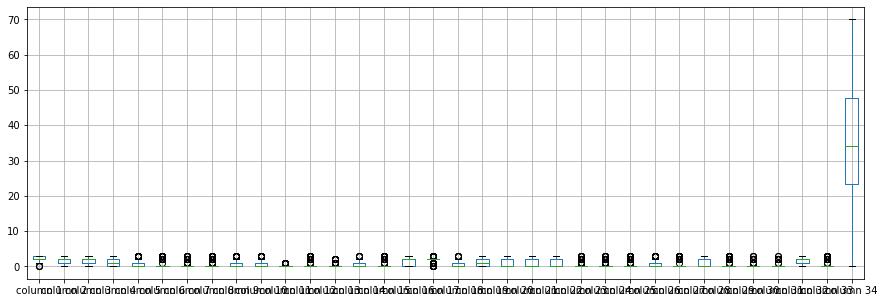

In [33]:
df.boxplot(return_type='axes', figsize=(15,5))

In [34]:
df.mean()

column 1      2.079861
column 2      1.811448
column 3      1.544828
column 4      1.367133
column 5      0.588028
column 6      0.463087
column 7      0.164983
column 8      0.396429
column 9      0.619048
column 10     0.496324
column 11     0.137809
column 12     0.379433
column 13     0.147482
column 14     0.546713
column 15     0.335664
column 16     1.332168
column 17     1.965035
column 18     0.500000
column 19     1.257732
column 20     0.658537
column 21     0.973333
column 22     0.671233
column 23     0.332155
column 24     0.355872
column 25     0.380282
column 26     0.464684
column 27     0.417808
column 28     0.989399
column 29     0.402778
column 30     0.099644
column 31     0.107143
column 32     1.898955
column 33     0.548611
column 34    35.034965
dtype: float64

In [35]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.469763,0.304187,0.033442,0.011902,0.042112,-0.110450,-0.105758,0.210651,0.210993,...,-0.077244,0.201547,-0.055921,0.040712,-0.077930,-0.082021,0.013800,0.084033,-0.084784,0.038019
column 2,0.469763,1.000000,0.350030,-0.046576,0.010769,-0.062143,-0.100001,-0.137143,0.294495,0.302073,...,-0.097699,0.185636,-0.184745,-0.007294,-0.176288,-0.027935,-0.046111,-0.002630,-0.192620,0.070285
column 3,0.304187,0.350030,1.000000,-0.120180,0.183134,0.288527,-0.096949,0.199033,0.358126,0.305766,...,0.245724,0.369108,0.233142,-0.326525,0.203997,-0.029602,-0.153163,0.112411,0.191686,0.130389
column 4,0.033442,-0.046576,-0.120180,1.000000,0.222794,0.408628,-0.166334,0.322551,-0.314904,-0.113222,...,0.339403,-0.169812,0.360528,0.086695,0.393933,-0.190758,-0.191269,0.012847,0.334814,0.049768
column 5,0.011902,0.010769,0.183134,0.222794,1.000000,0.412333,-0.194822,0.421925,-0.126046,-0.062337,...,0.403107,0.045022,0.402692,0.106080,0.332244,-0.150706,-0.161378,0.100213,0.350101,0.034839
column 6,0.042112,-0.062143,0.288527,0.408628,0.412333,1.000000,-0.148488,0.839517,-0.277189,-0.268528,...,0.903181,-0.156268,0.907159,0.114577,0.891339,-0.091631,-0.122845,0.225824,0.908217,0.116911
column 7,-0.110450,-0.100001,-0.096949,-0.166334,-0.194822,-0.148488,1.000000,-0.123350,0.328542,-0.020150,...,-0.095210,-0.150073,-0.137817,-0.030631,-0.135107,0.816487,0.891164,-0.156504,-0.124100,-0.372599
column 8,-0.105758,-0.137143,0.199033,0.322551,0.421925,0.839517,-0.123350,1.000000,-0.302894,-0.272511,...,0.875285,-0.153308,0.895480,0.088395,0.871009,-0.057006,-0.092448,0.267298,0.877825,0.130188
column 9,0.210651,0.294495,0.358126,-0.314904,-0.126046,-0.277189,0.328542,-0.302894,1.000000,0.626116,...,-0.262060,0.511328,-0.281492,-0.405197,-0.275629,0.291254,0.318717,-0.105022,-0.287915,-0.040413
column 10,0.210993,0.302073,0.305766,-0.113222,-0.062337,-0.268528,-0.020150,-0.272511,0.626116,1.000000,...,-0.245571,0.524744,-0.244055,-0.426184,-0.242427,-0.117917,-0.000161,0.046719,-0.259636,0.057569


In [36]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [37]:
imputer = md.Midas(layer_structure = [34,34+29,34+29+29,34+29+29+29,34+29+29+29+29,34+29+29+29+29+29,34+29+29+29+29+29+29,34+29+29+29+29+29+29+29,34+29+29+29+29+29+29,34+29+29+29+29+29,34+29+29+29+29,34+29+29+29,34+29+29,34+29,34], vae_layer = False, seed = 29)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 60.096168518066406
Epoch: 1 , loss: 60.05315815318715
Epoch: 2 , loss: 59.8481032631614
Epoch: 3 , loss: 59.51102776960893
Epoch: 4 , loss: 59.58449571782892
Epoch: 5 , loss: 59.466840050437234
Epoch: 6 , loss: 59.59633792530406
Epoch: 7 , loss: 58.64956925132058
Epoch: 8 , loss: 56.292179107666016
Epoch: 9 , loss: 54.78461508317427
Epoch: 10 , loss: 54.091548746282406
Epoch: 11 , loss: 53.71295755559748
Epoch: 12 , loss: 53.219239321621984
Epoch: 13 , loss: 53.16585020585494
Epoch: 14 , loss: 52.80752216685902
Epoch: 15 , loss: 52.508943731134586
Epoch: 16 , loss: 52.201833898370914
Epoch: 17 , loss: 51.74906262484464
Epoch: 18 , loss: 51.430855837735265
Epoch: 19 , loss: 51.64363063465465
Epoch: 20 , loss: 52.09922200983221
Epoch: 21 , loss: 51.384009101174094
Epoch: 22 , loss: 51.04360667142001
Epoch: 23 , loss: 51.19004249572754
Epoch: 24 , loss: 50.7393987829035
Epoch: 25 , loss: 50.8960110057484


In [38]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [39]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      2.343602
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      2.000000
column 8      0.000000
column 9      3.000000
column 10     2.000000
column 11     0.000000
column 12     0.182906
column 13     0.000000
column 14     0.869581
column 15     0.000000
column 16     1.000000
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.000000
column 22     0.940125
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     1.140387
column 29     0.000000
column 30     0.000000
column 31     1.000000
column 32     1.000000
column 33     1.000000
column 34    12.000000
Name: 21, dtype: float64

In [40]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [41]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.183763,-1.385365,-1.483585,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.387213,0.000000,0.507360,0.000000,0.00000,0.000000,0.000000,0.183900,0.000000
2,0.000000,-1.105946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.123864,0.162432,0.000000,-1.625344,0.000000,0.00000,-2.984562,0.000000,0.000000,7.237090
3,0.000000,0.000000,0.000000,-0.295601,0.400372,0.000000,0.000000,0.000000,0.000000,-1.592557,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-0.773073,0.000000,0.000000
4,0.000000,0.000000,-0.361217,0.000000,0.258845,0.000000,0.000000,0.091687,0.000000,0.000000,...,0.046642,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.292554,0.085457,0.000000,0.126847,0.00000,0.000000,0.000000,0.179300,0.000000
354,0.543233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.747911,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
355,0.000000,0.000000,0.965173,1.298818,0.000000,0.000000,0.000000,0.000000,0.922207,0.000000,...,0.265974,0.000000,0.000000,0.000000,0.000000,0.00000,0.086284,0.000000,0.000000,-16.464020
356,0.000000,0.556221,0.000000,0.000000,0.634488,0.000000,0.103874,0.000000,0.000000,0.000000,...,0.000000,0.334832,0.206153,0.000000,0.000000,0.02101,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [42]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [43]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [44]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(212.91843044987925, 758.0725558942231)

In [45]:
NRMS=numerator/denominator
NRMS


0.2808681422304234

In [46]:
new_df.iloc[66,:]

column 1      2.000000
column 2      0.000000
column 3      1.728319
column 4      1.796098
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.914880
column 10     0.621989
column 11     0.000000
column 12     0.168222
column 13     0.000000
column 14     0.000000
column 15     2.000000
column 16     2.000000
column 17     2.000000
column 18     0.000000
column 19     0.000000
column 20     0.795535
column 21     3.000000
column 22     0.000000
column 23     0.433449
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.919710
column 29     0.294485
column 30     0.000000
column 31     0.003078
column 32     2.000000
column 33     0.000000
column 34    22.000000
Name: 66, dtype: float64

In [47]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.183763,0.614635,0.516415,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000
1,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000,...,0.000000,0.387213,0.000000,0.507360,0.000000,2.00000,2.000000,2.000000,0.183900,7.000000
2,2.000000,0.894054,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.123864,0.162432,0.000000,0.374656,0.000000,3.00000,0.015438,2.000000,0.000000,14.237090
3,2.000000,2.000000,2.000000,0.704399,0.400372,0.000000,2.000000,0.000000,2.000000,0.407443,...,0.000000,0.000000,0.000000,2.000000,0.000000,2.00000,2.000000,1.226927,0.000000,7.000000
4,2.000000,2.000000,0.638783,0.000000,0.258845,0.000000,2.000000,0.091687,2.000000,0.000000,...,0.046642,0.000000,0.000000,3.000000,0.000000,2.00000,2.000000,2.000000,0.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.000000,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.292554,0.085457,3.000000,0.126847,0.00000,0.000000,3.000000,0.179300,70.000000
354,2.543233,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.252089,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,70.000000
355,2.000000,2.000000,2.965173,2.298818,0.000000,0.000000,0.000000,0.000000,0.922207,0.000000,...,0.265974,0.000000,0.000000,2.000000,0.000000,0.00000,0.086284,2.000000,0.000000,53.535980
356,2.000000,1.556221,0.000000,3.000000,0.634488,0.000000,0.103874,0.000000,0.000000,0.000000,...,0.000000,0.334832,0.206153,0.000000,0.000000,0.02101,0.000000,1.000000,0.000000,70.000000


In [48]:
imputations[-1].to_excel("DERM_C_20(imp).xlsx", index=False, header=False)